# Data Science Challenge

In [2]:
# To install packages that are not installed by default, uncomment the last two lines 
# of this cell and replace <package list> with a list of necessary packages.
# This will ensure the notebook has all the dependencies and works everywhere.

#import sys
#!{sys.executable} -m pip install <package list>

In [1]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", None)

## Data Description

Column | Description
:---|:---
`id` | The unique ID assigned to every hotel.
`region` | The region in which the hotel is located..
`latitude` | The latitude of the hotel.
`longitude` | The longitude of the hotel.
`accommodation_type` | The type of accommodation offered by the hotel. For example: Private room, Entire house/apt, etc.
`cost` | The cost of booking the hotel for one night. (in \$\$)
`minimum_nights` | The minimum number of nights stay required.
`number_of_reviews` | The number of reviews accumulated by the hotel.
`reviews_per_month` | The average number of reviews received by the hotel per month.
`owner_id` | The unique ID assigned to every owner. An owner can own multiple hotels.
`owned_hotels` | The number of hotels owned by the owner.
`yearly_availability` | It indicates if the hotel accepts bookings around the year. Values are 0 (not available for 365 days in a year) and 1 (available for 365 days in a year).

## Data Wrangling & Visualization

In [4]:
# Dataset is already loaded below
data = pd.read_csv("train.csv")

In [5]:
data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
0,13232,Manhattan,40.71854,-74.00439,Entire home/apt,170,5,7,0.56,929983,1,0
1,246,Brooklyn,40.64446,-73.95030,Entire home/apt,65,3,238,2.30,281764,1,0
2,19091,Queens,40.78573,-73.81062,Private room,85,1,0,NaN,19923341,1,1
3,34305,Manhattan,40.73863,-73.98002,Private room,210,30,0,NaN,200380610,65,1
4,444,Manhattan,40.82426,-73.94630,Shared room,75,3,38,0.42,745069,3,1


In [6]:
#Explore columns
data.columns

Index(['id', 'region', 'latitude', 'longitude', 'accommodation_type', 'cost',
       'minimum_nights', 'number_of_reviews', 'reviews_per_month', 'owner_id',
       'owned_hotels', 'yearly_availability'],
      dtype='object')

### Summary Statistics

In [7]:
#Description
data.describe()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability
count,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2870.000000,2194.000000,2.870000e+03,2870.000000,2870.000000
mean,26760.657143,40.731224,-73.950158,195.943206,11.530314,16.315331,1.157502,7.202195e+07,8.411498,0.498606
std,14140.930062,0.054942,0.049745,406.184714,37.972339,32.481722,1.355028,8.076516e+07,27.105522,0.500085
min,0.000000,40.507080,-74.242850,10.000000,1.000000,0.000000,0.010000,2.787000e+03,1.000000,0.000000
25%,15931.750000,40.692462,-73.984003,75.000000,1.000000,1.000000,0.240000,7.388002e+06,1.000000,0.000000
50%,28946.500000,40.728250,-73.956720,120.000000,3.000000,4.000000,0.650000,3.352708e+07,1.000000,0.000000
75%,38478.500000,40.762658,-73.934202,200.000000,6.000000,16.000000,1.530000,1.207625e+08,3.000000,1.000000
max,48893.000000,40.898730,-73.721730,9999.000000,999.000000,395.000000,10.370000,2.738123e+08,327.000000,1.000000


##### Data types

In [8]:
# Data types for each column / feature
data.dtypes

id                       int64
region                  object
latitude               float64
longitude              float64
accommodation_type      object
cost                     int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
owner_id                 int64
owned_hotels             int64
yearly_availability      int64
dtype: object

#### Check for missing data

In [9]:
# Checking whether there are nulls ("missing data") in the columns
data.isnull().sum(axis=0)

id                       0
region                   0
latitude                 0
longitude                0
accommodation_type       0
cost                     0
minimum_nights           0
number_of_reviews        0
reviews_per_month      676
owner_id                 0
owned_hotels             0
yearly_availability      0
dtype: int64

**Comment**: The feature "reviews_per_month" has 676 null variables. In addition, the feature "number_of_reviews" does not have missing values. Furthermore, the nulls only exist in cases where there have been "0" (zero) number_of_reviews e.g. if there are no reviews at all for a hotel then there won't be an average number of reviews per month either. Subsequently, dropping 676 observations would result in significant loss of data since none of the other rows have missing values. Thus, we replace the null values with 0 for the reviews per month.

In [42]:
# replace null values with 0
data.reviews_per_month = data.reviews_per_month.fillna(0)

##### One-hot Encode the Categorical Data:

We convert the categorical feature columns to seprate columns witch take a value of 0 and 1. We drop for each categorical variable column in order to avoid multicollinearity, which reduces the predictive performance of a model.

In [43]:
# One-hot Encode the Categorical Data
data = pd.get_dummies(data, drop_first = True)

In [44]:
data.head()

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
0,13232,40.71854,-74.00439,170,5,7,0.56,929983,1,0,0,1,0,0,0,0
1,246,40.64446,-73.95030,65,3,238,2.30,281764,1,0,1,0,0,0,0,0
2,19091,40.78573,-73.81062,85,1,0,0.00,19923341,1,1,0,0,1,0,1,0
3,34305,40.73863,-73.98002,210,30,0,0.00,200380610,65,1,0,1,0,0,1,0
4,444,40.82426,-73.94630,75,3,38,0.42,745069,3,1,0,1,0,0,0,1


<Figure size 432x288 with 0 Axes>

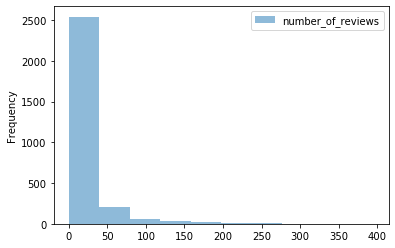

In [91]:
plt.figure()
data[["number_of_reviews"]].plot.hist(alpha=0.5);

<Figure size 432x288 with 0 Axes>

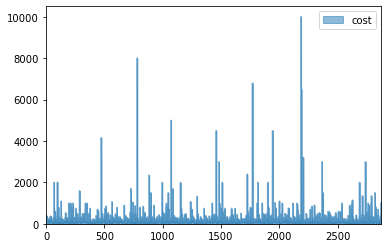

In [90]:
plt.figure()
data[["cost"]].plot.area(stacked=False)

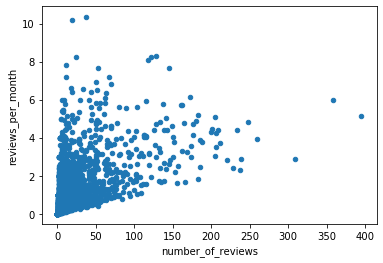

In [92]:
data.plot.scatter(x="number_of_reviews", y="reviews_per_month");

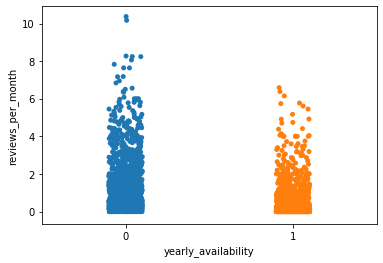

In [94]:
sns.stripplot(x="yearly_availability", y="reviews_per_month", data=data) 

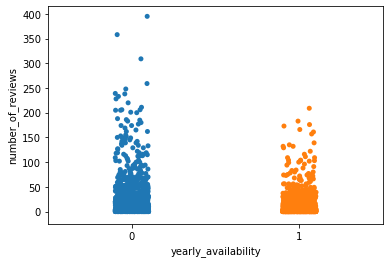

In [95]:
sns.stripplot(x="yearly_availability", y="number_of_reviews", data=data) 

## Visualization, Modeling, Machine Learning

Build a model that categorizes hotels on the basis of their yearly availability.  Identify how different features influence the decision. Please explain the findings effectively to technical and non-technical audiences using comments and visualizations, if appropriate.
- **Build an optimized model that effectively solves the business problem.**
- **The model will be evaluated on the basis of Accuracy.**
- **Read the test.csv file and prepare features for testing.**

In [45]:
## Change the name of the data to training data
train_data=data

##### We assess the correlation between the features in the original training data. 
- First, we generate the correlation matrix between all the features.

In [46]:
# Correlation Matrix between the features
corr_df = train_data.corr()
corr_df

,id,latitude,longitude,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels,yearly_availability,region_Brooklyn,region_Manhattan,region_Queens,region_Staten Island,accommodation_type_Private room,accommodation_type_Shared room
id,1.000000,-0.016030,0.059679,-0.036814,-0.078409,-0.330155,0.145984,0.523565,0.025907,-0.161629,-0.031877,-0.011724,0.055043,-0.001372,-0.107070,0.150788
latitude,-0.016030,1.000000,0.049337,0.009657,0.010614,0.006295,0.015358,-0.009361,0.064103,-0.025119,-0.678672,0.575303,-0.013750,-0.159718,0.000188,-0.005122
longitude,0.059679,0.049337,1.000000,-0.136140,-0.074862,0.006381,0.052653,0.142912,-0.142529,0.119882,-0.004712,-0.474424,0.651172,-0.248123,0.048603,0.013993
cost,-0.036814,0.009657,-0.136140,1.000000,0.052918,-0.074432,-0.123086,-0.049586,0.032185,0.147576,-0.084543,0.141398,-0.066359,0.003322,0.126273,-0.020195
minimum_nights,-0.078409,0.010614,-0.074862,0.052918,1.000000,-0.088767,-0.139803,-0.018005,0.107893,0.173550,-0.045813,0.071547,-0.026489,-0.006379,0.166778,-0.049767
number_of_reviews,-0.330155,0.006295,0.006381,-0.074432,-0.088767,1.000000,0.576553,-0.161979,-0.112328,-0.191645,0.053843,-0.032103,-0.026691,-0.028090,-0.177441,-0.082181
reviews_per_month,0.145984,0.015358,0.052653,-0.123086,-0.139803,0.576553,1.000000,0.077579,-0.147011,-0.312213,0.021694,-0.042358,0.022218,-0.007715,-0.300600,-0.010960
owner_id,0.523565,-0.009361,0.142912,-0.049586,-0.018005,-0.161979,0.077579,1.000000,0.074535,0.121234,-0.064757,-0.046818,0.129014,0.032356,0.078203,0.035398
owned_hotels,0.025907,0.064103,-0.142529,0.032185,0.107893,-0.112328,-0.147011,0.074535,1.000000,0.191906,-0.156839,0.209776,-0.064695,-0.017487,0.138570,-0.048646
yearly_availability,-0.161629,-0.025119,0.119882,0.147576,0.173550,-0.191645,-0.312213,0.121234,0.191906,1.000000,-0.079190,-0.019062,0.094650,0.050205,0.690654,-0.081234


- Second We calculate the correlation, in absolute values, between our target variable, yearly_availability with the rest of the features and we sort them.

In [47]:
corr_df.yearly_availability.abs().sort_values(ascending=False)

yearly_availability                1.000000
accommodation_type_Private room    0.690654
reviews_per_month                  0.312213
owned_hotels                       0.191906
number_of_reviews                  0.191645
minimum_nights                     0.173550
id                                 0.161629
cost                               0.147576
owner_id                           0.121234
longitude                          0.119882
region_Queens                      0.094650
accommodation_type_Shared room     0.081234
region_Brooklyn                    0.079190
region_Staten Island               0.050205
latitude                           0.025119
region_Manhattan                   0.019062
Name: yearly_availability, dtype: float64

There is an indication that the yearly availability is highly correlated with hotels that provide private rooms as an accomodation type, the numeber of reviews overall and per month, the number of hotels which are owned and the minimum number of rights required to stay among others. 

- We illustrate the correlation matrix between the different features.

In [48]:
# import visualization 
import seaborn as sns
import matplotlib.pyplot as plt

Text(0.5, 1, 'Correlation between features')

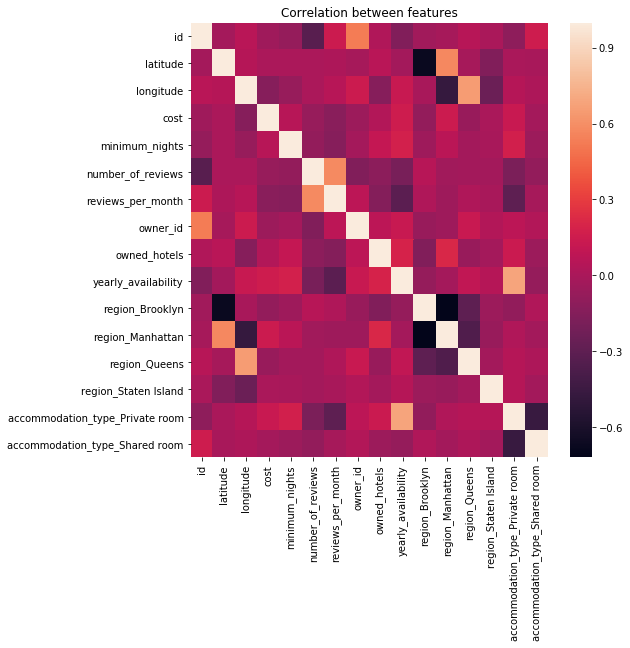

In [49]:
plt.figure(figsize=(8, 8))
ax=plt.axes()
sns.heatmap(corr_df, ax = ax)
ax.set_title("Correlation between features")

#### Feature selection

- Several features are not necessary for predictive purposes. For instance, the geolocation can be dropped, since we have information for the regions. In addition, the feature "id", which is the unique identifer for each can be dropped, along with the "owner_id" will not be useful. One reason is that for predictive purposes, the "test" data may be composed by different hotels with different "identifiers", subsequently the results will not be generalizable. We want our model to not just work for this data-set. Technically, we also avoid "overfitting" the model.

Drop features that will not be used in the machine learning model:

In [50]:
# Dropping features that will overfit the model
train_data_feature=train_data.drop(['id','latitude','longitude','owner_id'], axis = 1) 

We will be using these **11** features in our model:

- accomodation_type_private_room
- reviews per month
- owned_hotels 
- owned_hotels
- minimum_nights
- cost
- region_Queens
- accommodation_type_Shared room 
- region_Brooklyn
- region_Staten Island
- region_Manhattan

# Creating the model

In [54]:
# We import modules that we will use.
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix  
from sklearn.metrics import accuracy_score
from sklearn import metrics
import numpy as np
from sklearn.metrics import classification_report

#### Assessing whether the data is balanced

Text(0.5, 0, 'Class= 0  or Availability | Class= 1 Availability')

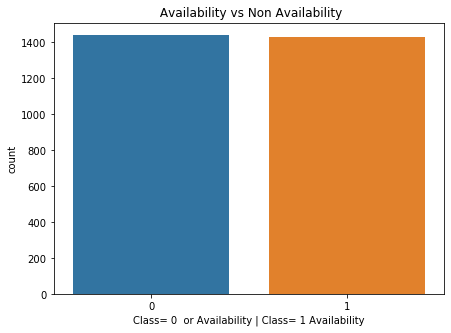

In [55]:
# Checking distribution of yearly_availability column in the training data
# Assessing whether the data is balanced
f, ax = plt.subplots(figsize=(7,5))
sns.countplot(x="yearly_availability",data=train_data_feature)
plt.title(" Availability vs Non Availability")
plt.xlabel("Class= 0  or Availability | Class= 1 Availability")

- ##### The data is balanced because the number of records for both classes are almost equal. Subsequently, accuracy is a good metric to evaluate the predictive perfomance of the model.

### Model of Choice: Random Forest Classifier

This is a binary classification problem because the target variable (yearly_availability) takes two values: 0 or 1. Random Forest is a model which can be used for such classification methods, although not the only one. 

*Technical note*: I select this model for the scope of this project it is less complex and faster than "XGBOOST", which matters if we don't have enough computational resources. It also provides a good balance between interpretability and accuracy, e.g. logistic regression models have better interpretability.

- We split the data to training and "test" sets

In [56]:
# Split the data to training and "test" sets
np.random.seed(7)
X = train_data_feature.drop(["yearly_availability"], axis=1)
y = train_data_feature['yearly_availability']
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

The dimensions of the data set after spliting the data into training and test sets

In [57]:
print("Training Data Dimensions:",X_train.shape,y_train.shape)
print("Test Data Dimensions:", X_test.shape,y_test.shape)

Training Data Dimensions: (2152, 11) (2152,)
Test Data Dimensions: (718, 11) (718,)


## Random Forest on Training Data. 

This is a subset of the data on which we train the model. We fit the model to elicit the parameters of interest.

- First: we tune the hyperaparameters of the model to find the best values to employ in the final predictive model

- The tuning is conducted with a Randomized Search 5 folds Cross Validation: *RandomizedSearchCV*

In [58]:
from sklearn.model_selection import RandomizedSearchCV

- I specify a numbers of different values for each hypermarameter to choose from. As mentioned I implement a Randomized Search. The goal is to find the optimal hyperparameters that improve the accuracy of our predictive model.

In [59]:
# Number of trees in random forest
n_estimators = [int(x) for x in range(200,2000,200)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_hyperprm = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_hyperprm)

{'n_estimators': [200, 400, 600, 800, 1000, 1200, 1400, 1600, 1800], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


- Next I implement the 5 fold cross-validation for different sets of hyperparameters

In [60]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
model_rf = RandomForestClassifier()
# 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
model_rf_cv = RandomizedSearchCV(estimator = model_rf, param_distributions = random_hyperprm, n_iter = 100, cv = 5, verbose=2, random_state=1, n_jobs = -1)
# Fit the random search model
model_rf_cv.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed: 10.6min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed: 14.4min finished


RandomizedSearchCV(cv=5, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=None

- Subsequently, the optimal hyperparameters to train the model are as follows:

The Optimal parameters which we will use after Tuning the model:

In [61]:
model_rf_cv.best_params_

{'n_estimators': 800,
 'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 20,
 'bootstrap': False}

- The next step is to evaluate the model using the optimal hyperparameters to predict the accuracy and confusion matrix in the test sample.

In [62]:
model_opt = model_rf_cv.best_estimator_
y_test_pred = model_opt.predict(X_test)

accuracy = accuracy_score(y_test, y_test_pred)*100

print('Confusion matrix:\n', confusion_matrix(y_test, y_test_pred))
print('Training accuracy: %.4f %%' % accuracy)

print(classification_report(y_test, y_test_pred, digits=4))

Confusion matrix:
 [[324  30]
 [ 17 347]]
Training accuracy: 93.4540 %
              precision    recall  f1-score   support

           0     0.9501    0.9153    0.9324       354
           1     0.9204    0.9533    0.9366       364

    accuracy                         0.9345       718
   macro avg     0.9353    0.9343    0.9345       718
weighted avg     0.9351    0.9345    0.9345       718



- The accuracy of the model on the out of sample testing data set is *93.3148 %* . 
- This is an indication that the model has good predictive performance. 
- The 5 cross validation step is important to avoid overfitting the data.

### Plot Confusion Matrix

In [65]:
cf_mat = confusion_matrix(y_test, y_test_pred)

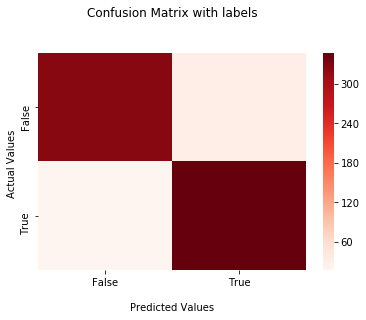

In [66]:
# plt.figure(figsize=(7,4))
ax = sns.heatmap(cf_mat, annot=False, cmap='Reds')

ax.set_title('Confusion Matrix with labels\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

## Ticket labels - List must be in alphabetical order
ax.xaxis.set_ticklabels(['False','True'])
ax.yaxis.set_ticklabels(['False','True'])

## Display the visualization of the Confusion Matrix.
plt.show()

### Test Data: clean and prepare test data for prediction

In [73]:
#Loading Test data
test_data=pd.read_csv('test.csv')
test_data.head()

,id,region,latitude,longitude,accommodation_type,cost,minimum_nights,number_of_reviews,reviews_per_month,owner_id,owned_hotels
0,19215,Brooklyn,40.70912,-73.94513,Shared room,135,2,22,0.66,4360212,1
1,36301,Brooklyn,40.57646,-73.96641,Entire home/apt,69,2,8,0.90,181356989,2
2,40566,Manhattan,40.76616,-73.98228,Private room,225,30,0,NaN,13773574,12
3,33694,Manhattan,40.77668,-73.94587,Shared room,125,30,9,0.82,6788748,1
4,28873,Manhattan,40.80279,-73.94450,Entire home/apt,43,1,13,0.72,105061915,2


In [74]:
test_data.shape

(718, 11)

- Transforming and cleaning test data

In [75]:
### Check if there are missing values in the "test" dataset
test_data.isnull().sum(axis=0)

id                      0
region                  0
latitude                0
longitude               0
accommodation_type      0
cost                    0
minimum_nights          0
number_of_reviews       0
reviews_per_month     173
owner_id                0
owned_hotels            0
dtype: int64

We replace the null values for the "reviews_per_month" variable to 0, instead of dropping them. The motivation is the same as before for the training data.

In [76]:
test_data.reviews_per_month = test_data.reviews_per_month.fillna(0)

In [77]:
# One-hot Encode the Categorical Data
test_data = pd.get_dummies(test_data,drop_first=True)

In [78]:
# Feature Selection
test_data_feature = test_data.drop(['id','latitude','longitude','owner_id'], axis = 1)

In [79]:
# Data to be used for the final submission:
test_data_feature.shape

(718, 11)



**Highlight the most important features of the model for management.**

> #### Task:
- **Visualize the top 20 features and their feature importance.**


One approach to answer this question is to explore the correlation between the features with the "yearly_availability". 

- We illustrate the strength and the nature of this relationship as follows:

In [70]:
corr_df_train = train_data_feature.corr()

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11]),
 <a list of 12 Text xticklabel objects>)

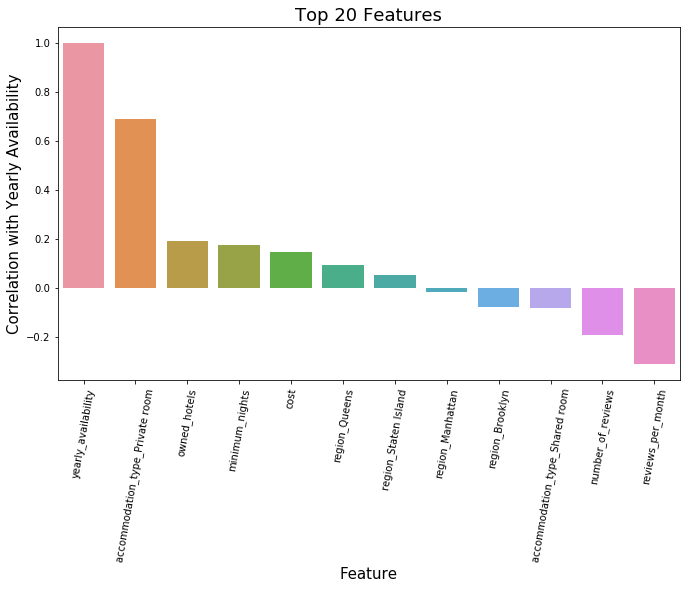

In [68]:
corr_df_viz=corr_df_train
corr_df_viz['feature'] = corr_df_viz.index

plt.figure(figsize=(10,6))
# make barplot
sns.barplot(x='feature',
            y='yearly_availability',
            data=corr_df_viz,
            order=corr_df_viz.sort_values('yearly_availability',ascending = False).feature)

# set labels
plt.xlabel("Feature", size = 15)
plt.ylabel("Correlation with Yearly Availability", size = 15)
plt.title("Top 20 Features", size=18)
plt.tight_layout()
plt.xticks(rotation=80)

**Results**: Overal, two features appear to be highly correlated with the yearly availability: the accomodation_type_private_room, and the reviews per month. The results illustrate that the the yearly availability is highly and positively correlated with hotels that provide private rooms as an accomodation type, tthe number of owned hotel, the numeber of reviews overall and per month, the number of hotels which are owned, and the minimum number of rights required to stay and the cost. In contrast, there is a negative correlation between the yearly_availability and the total number of reviews and the reviews per month. It appears that hotels which have a yearly availability for 365 days in a year tend to have less reviews.

- We generate again a Table of the correlations ( in absolute values) between yearly_ availability to the selected features. The correlations are sorted from highest to lowest: 

In [69]:
corr_df_train.yearly_availability.abs().sort_values(ascending=False)

yearly_availability                1.000000
accommodation_type_Private room    0.690654
reviews_per_month                  0.312213
owned_hotels                       0.191906
number_of_reviews                  0.191645
minimum_nights                     0.173550
cost                               0.147576
region_Queens                      0.094650
accommodation_type_Shared room     0.081234
region_Brooklyn                    0.079190
region_Staten Island               0.050205
region_Manhattan                   0.019062
Name: yearly_availability, dtype: float64

It should be noted that the reviews_per_month and the number_of_reviews are strongly and positively correlated, which makes sense.

- This is an indication that the yearly availability is highly correlated with hotels that provide private rooms as an accomodation type, the number of reviews overall and per month, the number of hotels which are owned and the minimum number of rights. 

Thus by order of magnitude the 11 most important features are:
- accomodation_type_private_room
- reviews per month
- owned_hotels 
- owned_hotels
- minimum_nights
- cost
- region_Queens
- accommodation_type_Shared room 
- region_Brooklyn
- region_Staten Island
- region_Manhattan

The following features have a negative correlations with hotels that are available throughout the entire year:
    
- reviews_per_month
- number_of_reviews
- accommodation_type_Shared room
- region_Brooklyn
- region_Manhattan

## Feature Importance with Random Forest 

- The model also allows us to further explore the feature importance after it was trained. We display the most important features based on the model.

- We sort the features in descending order as follows:

In [71]:
pd.DataFrame({'Feature':X_train.columns,
              'Importance':model_opt.feature_importances_}).sort_values('Importance', ascending=False)

,Feature,Importance
9,accommodation_type_Private room,0.424696
4,owned_hotels,0.167984
3,reviews_per_month,0.101982
10,accommodation_type_Shared room,0.086491
2,number_of_reviews,0.077632
1,minimum_nights,0.060966
0,cost,0.058301
7,region_Queens,0.007862
6,region_Manhattan,0.007435
5,region_Brooklyn,0.006603


- We visualize the importance of each feature in the model

Text(0.5, 0, 'Random Forest Feature Importance')

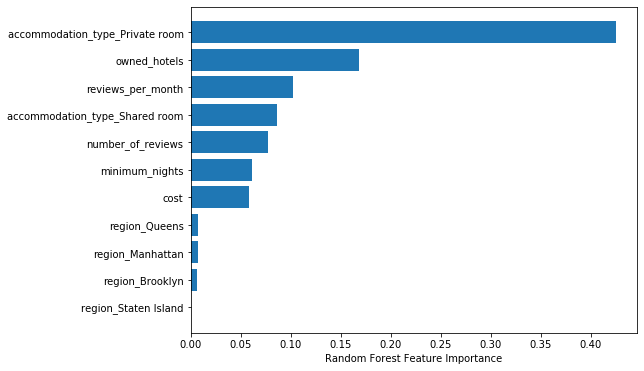

In [72]:
sorted_idx = model_opt.feature_importances_.argsort()
plt.figure(figsize=(8,6))
plt.barh(X_train.columns[sorted_idx], model_opt.feature_importances_[sorted_idx])
plt.xlabel("Random Forest Feature Importance")

The results are consistent with what we saw with the correlation analysis. Private Rooms as an accomodation type the most prominent feature to on wheher there is a yearly availability for a hotel, followed by the number of hotels owned by the owner, and the reviews per month. 

*Overall* hotels with accomodation type of private rooms are important factor on whether they are available throughout the entire year.

Subsequently, this analysis can be used by **Travel Express** to decide the hotels it want to include when yearly availability is decision criteria.

> #### Task:
- **Submit the predictions on the test dataset using your optimized model** <br/>
    For each record in the test set (`test.csv`), predict the value of the `yearly_availability` variable. Submit a CSV file with a header row and one row per test entry.

The file (`submissions.csv`) should have exactly 2 columns:
   - **id**
   - **yearly_availability**

In [80]:
# Combining prediction results to IDs.
pred_list = list(model_opt.predict(test_data_feature))
pred_id =  list(test_data['id'])
submission_df=pd.DataFrame(list(zip(pred_id, pred_list)) , columns=['id','yearly_availability'])

In [81]:
submission_df

,id,yearly_availability
0,19215,0
1,36301,0
2,40566,1
3,33694,0
4,28873,0
...,...,...
713,26801,0
714,20110,0
715,31383,0
716,47135,1


In [85]:
#Submission
submission_df.to_csv('submissions.csv',index=False)

---